In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
money = pd.read_csv('notes.csv') #importation des données

In [59]:
money

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


In [60]:
money.info()
# Pas de null dans le dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [61]:
money.duplicated()
# Aucune ligne en double

0      False
1      False
2      False
3      False
4      False
       ...  
165    False
166    False
167    False
168    False
169    False
Length: 170, dtype: bool

### Les spécificités des billets selon leur authenticité

In [62]:
pd.set_option('display.max_columns', None)
money.groupby('is_genuine').describe()

diagonal                                                   \
              count        mean       std     min       25%      50%   
is_genuine                                                             
False          70.0  171.889857  0.297426  171.38  171.6825  171.875   
True          100.0  171.976100  0.307981  171.04  171.7900  172.005   

                             height_left                                \
                 75%     max       count        mean       std     min   
is_genuine                                                               
False       172.0475  173.01        70.0  104.230429  0.213130  103.78   
True        172.1625  172.75       100.0  103.951500  0.296251  103.23   

                                                height_right              \
                 25%      50%       75%     max        count        mean   
is_genuine                                                                 
False       104.0825  104.215  104.3775  104.72         70.0  104.145571   
True        103.7400  103.915  104.1450  104.86        100.0  103.775900   

                                                                 margin_low  \
                 std     min       25%     50%       75%     max      count   
is_genuine                                                                    
False       0.253152  103.44  103.9825  104.17  104.2800  104.86       70.0   
True        0.292406  103.14  103.5575  103.76  103.9725  104.95      100.0   

                                                                  margin_up  \
                mean       std   min     25%    50%     75%   max     count   
is_genuine                                                                    
False       5.281571  0.540846  3.82  4.9525  5.265  5.7025  6.28      70.0   
True        4.143500  0.314509  3.54  3.9000  4.080  4.3825  5.04     100.0   

                                                                  length  \
                mean       std   min     25%    50%     75%   max  count   
is_genuine                                                                 
False       3.334571  0.185102  2.98  3.1850  3.335  3.4500  3.68   70.0   
True        3.055500  0.197726  2.27  2.9375  3.070  3.1925  3.53  100.0   

                                                                             
                  mean       std     min      25%      50%      75%     max  
is_genuine                                                                   
False       111.660714  0.676931  109.97  111.270  111.765  111.985  113.64  
True        113.207200  0.380476  111.76  112.995  113.210  113.505  113.98

<b>Quelles sont les spécificités d'un vrai billet ?</b>
<br>Hauteur gauche : 103.95 mm
<br>Hauteur droite : 103.77 mm
<br>Marge supérieur : 3.05 mm
<br>Marge inférieur : 4.14mm
<br>Longueur : 113.21 mm
<br>Diagonale : 171.97 mm

In [63]:
#Définition du style des graphiques
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#FFFFFF', edgecolor='gray',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 15})

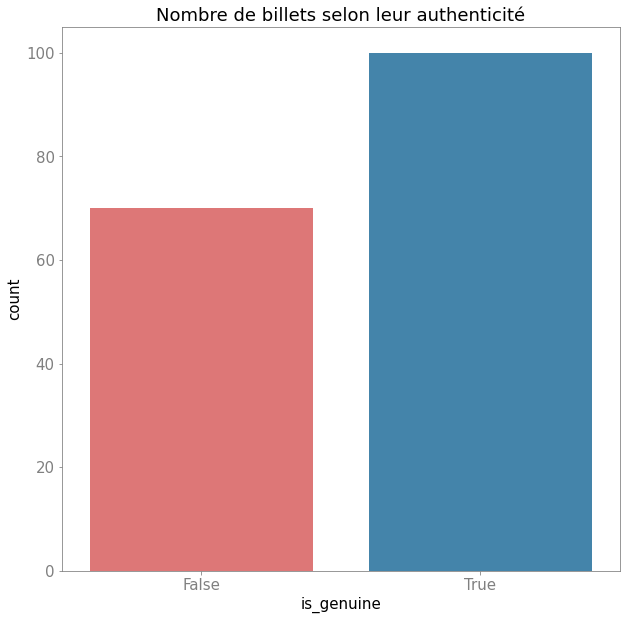

In [64]:
sns.countplot(data=money, x='is_genuine')
plt.title('Nombre de billets selon leur authenticité')
plt.show()

### Analyse des corrélations entre les différents billets

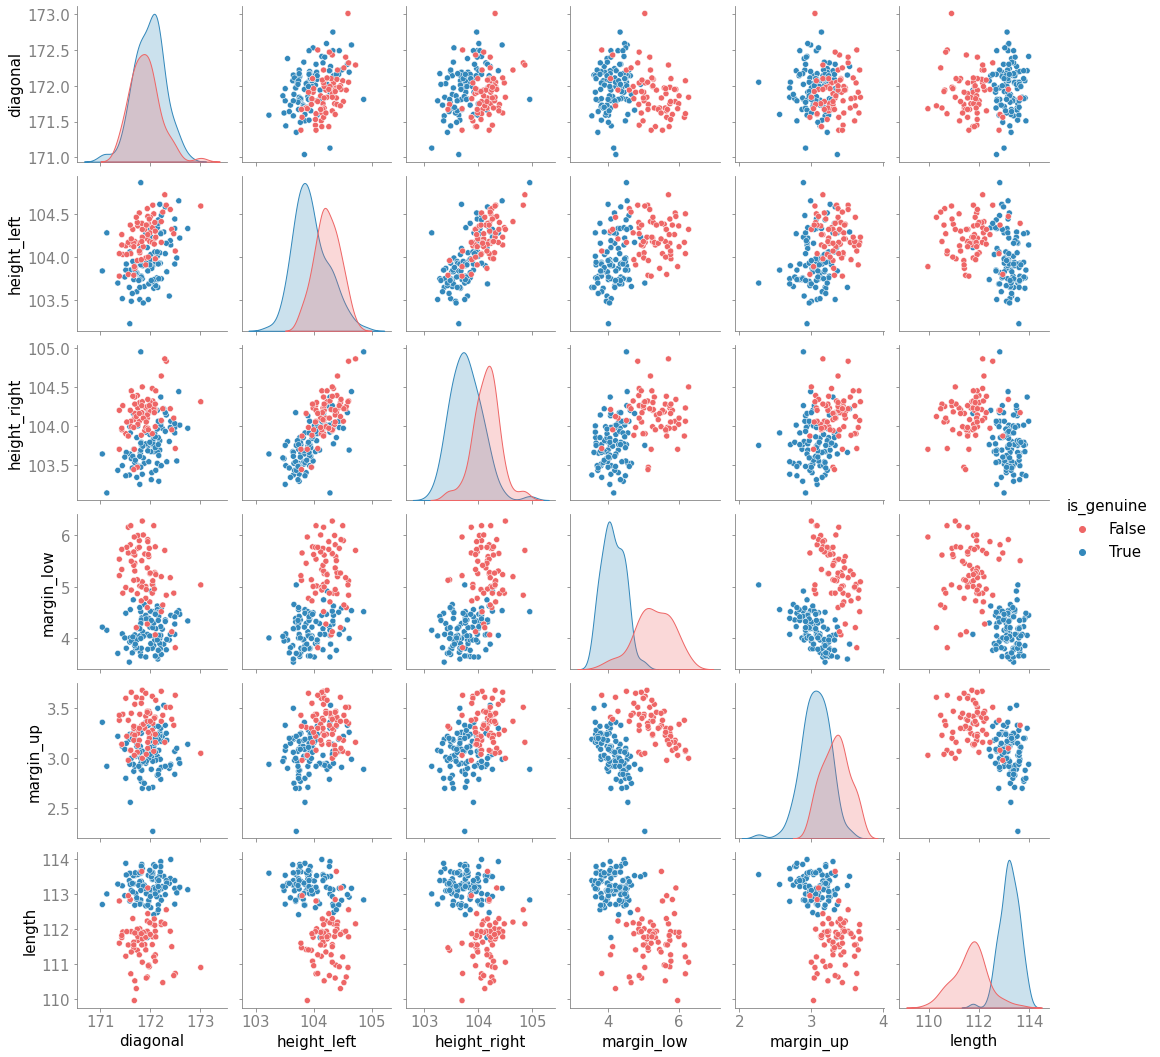

In [65]:
money = money.dropna(axis=0, how='any')
sns.pairplot(money,hue="is_genuine")
plt.show()

Nous distinguons une vraie différence entre la longueur et la marge inférieure des billets selon leur authenticité. Ces deux variables ne suivent pas la loi normale pour les faux billets.

### Analyse de la variabilité des propriétés "marge inférieure" et "longueur" selon l'authenticité des billets

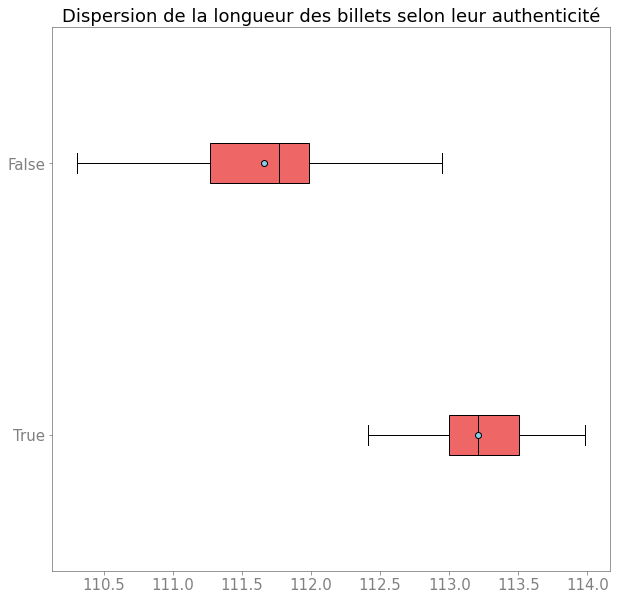

In [66]:
X = "is_genuine" # qualitative
Y = "length" # quantitative

modalites = money[X].unique()
groupes = []
for m in modalites:
    groupes.append(money[money[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'skyblue'}
plt.title('Dispersion de la longueur des billets selon leur authenticité')
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
        
plt.show()

In [67]:
X = "is_genuine" # qualitative
Y = "length" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_squared(money[X],money[Y])
#corrélation

0.6818507654957807

L'éta carré montre ici une importante corrélation entre la longueur et l'authenticité du billet.

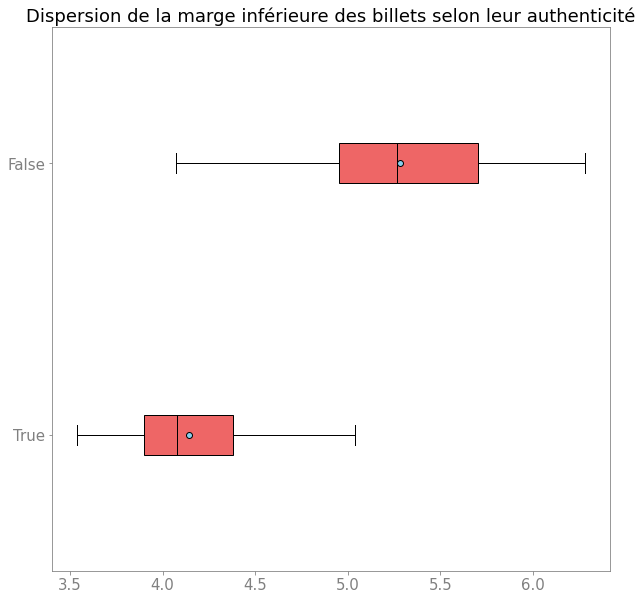

In [68]:
X = "is_genuine" # qualitative
Y = "margin_low" # quantitative

modalites = money[X].unique()
groupes = []
for m in modalites:
    groupes.append(money[money[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'skyblue'}

plt.title('Dispersion de la marge inférieure des billets selon leur authenticité')
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [69]:
X = "is_genuine" # qualitative
Y = "margin_low" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_squared(money[X],money[Y])
#corrélation

0.640177214288775

Nous retrouvons ici la même conclusion, l'éta carré montre bien une corrélation entre l'authenticité du billet et la marge inférieure. Nous pouvons donc supposer que ces deux variables auront une importante contribution dans les prédictions faites par notre modèle.

### Test de comparaison : égalités des variances et des moyennes

In [70]:
import scipy as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp

cols = money[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

cols_0 = money[['margin_low', 'length']]
cols_1 = money[['diagonal', 'height_right','margin_up']]

for i in cols:
    true = money.loc[money['is_genuine'] == True][i]
    false = money.loc[money['is_genuine'] == False][i]
    print(i.capitalize())
    if i in cols_0:
        print('Test de Mann-Whitney : ', st.stats.mannwhitneyu(true, false))
    elif i in cols_1:
        print('Test de Bartlett :', st.stats.bartlett(true,false))
        print('Test de Student :', st.stats.ttest_ind(true,false, equal_var=True))
    else:
        print('Test de Bartlett :', st.stats.bartlett(true,false))
        print('Test de Welsch :', st.stats.ttest_ind(true,false, equal_var=False))

Diagonal
Test de Bartlett : BartlettResult(statistic=0.09785668979597505, pvalue=0.7544170098956573)
Test de Student : Ttest_indResult(statistic=1.8222865515506024, pvalue=0.07018967008887296)
Height_left
Test de Bartlett : BartlettResult(statistic=8.294302164373534, pvalue=0.003976965959594022)
Test de Welsch : Ttest_indResult(statistic=-7.138967397007879, pvalue=2.7083988500085442e-11)
Height_right
Test de Bartlett : BartlettResult(statistic=1.6456014709345594, pvalue=0.19955865324739466)
Test de Student : Ttest_indResult(statistic=-8.564989194564754, pvalue=6.665246409290165e-15)
Margin_low
Test de Mann-Whitney :  MannwhitneyuResult(statistic=306.0, pvalue=2.44739545685913e-24)
Margin_up
Test de Bartlett : BartlettResult(statistic=0.34879710746030196, pvalue=0.554794849415443)
Test de Student : Ttest_indResult(statistic=-9.295866009945723, pvalue=7.567386063614238e-17)
Length
Test de Mann-Whitney :  MannwhitneyuResult(statistic=226.0, pvalue=1.7876766232996412e-25)


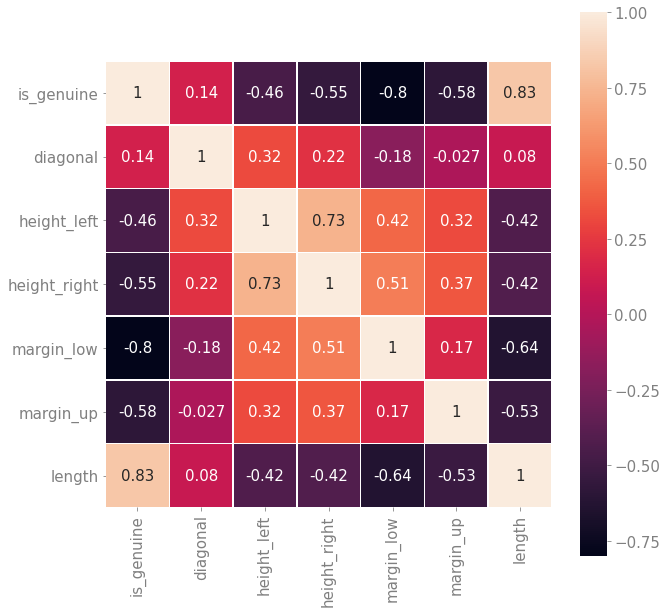

In [71]:
corr_billets = money.corr()
sns.heatmap(corr_billets, square=True, annot=True, linewidths=.5)
plt.show()

La matrice montre une corrélation logique entre les hauteurs des billets.
De plus, la marge inférieure et la longueur des billets continuent de se distinguer et la matrice confirme la corrélation entre ces variables et l'authenticité des billets. 

On note toutefois une corrélation négative de l'authenticité des billets avec la marge basse et positive avec la longueur.

# Mission 1 : Analyse en composantes principales

In [72]:
money_acp=money.copy()

In [73]:
money.set_index('is_genuine', inplace = True)

### <b>Combien de composantes à analyser ?</b>

Après avoir réaliser une première ACP avec 6 composantes, j'ai choisi de ne conserver que les composantes F1 et F2 en me basant sur le critère de Kaiser.

<b>Critère de Kaiser</b> : on ne retient que les axes dont l’inertie est supérieure à l’inertie moyenne (100/p)% avec p = 6 : (100/6) = 16.6%. 
Le premier axe conserve 47.4% de l’inertie du nuage. Nous avons besoin de deux axes afin de construire le plan. Le second axe conserve une part importante de l’inertie totale, 22%. 

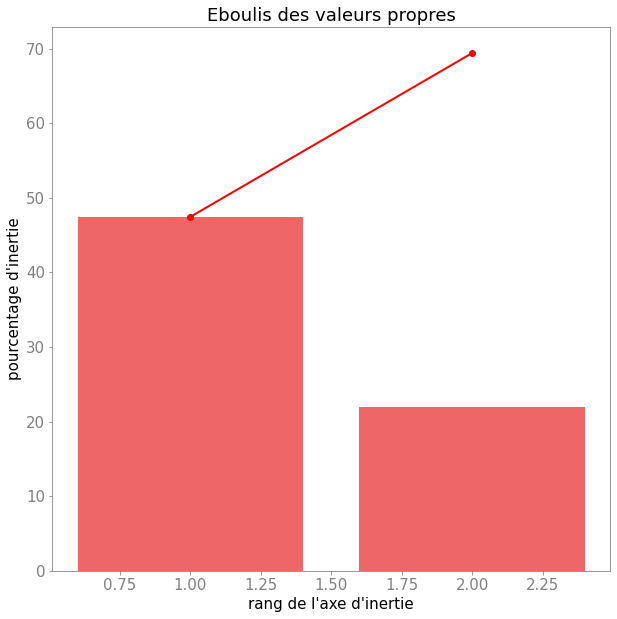

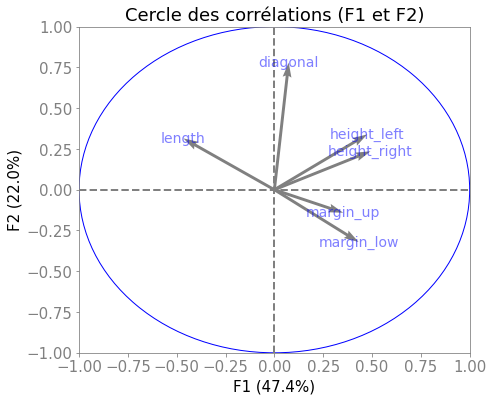

In [74]:
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# choix du nombre de composantes à calculer
n_comp = 2

# selection des colonnes à prendre en compte dans l'ACP
data_pca = money_acp[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data_pca.index # ou data.index pour avoir les intitulés
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

La corrélation logique entre les hauteurs et les marges est confirmée ici. La longueur influe fortement sur la composante <b>F2</b>. <br/>La composante <b>F1</b> réunit surtout les variables sur la hauteur et les marges, elle doit "capturer" le maximum d’inertie (<i>on appelle inertie la quantité d’information contenue dans un tableau de données, elle est égale à la somme des variances de l'ensemble des caractères</i>) du tableau des données. 
<br/>La marge basse a une flèche plus grande que la marge haute ce qui confirme encore une fois son influence plus importante sur l'authenticité des billets.

In [75]:
composantes=pd.DataFrame(pca.fit_transform(X_scaled), index=money_acp.index)
composantes.columns=["F1", "F2"]
composantes.head(4)

,F1,F2
0,2.153639,1.599709
1,-2.110416,-0.526039
2,-1.973152,-0.048102
3,-2.059795,-0.089105


On ajoute nos composantes F1 et F2 à notre dataframe afin de réaliser la projection des individus selon leur authenticité

In [76]:
money_acp["F1"]=composantes["F1"]
money_acp["F2"]=composantes["F2"]
money_acp

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,F1,F2
0,True,171.81,104.86,104.95,4.52,2.89,112.83,2.153639,1.599709
1,True,171.67,103.74,103.70,4.01,2.87,113.29,-2.110416,-0.526039
2,True,171.83,103.76,103.76,4.40,2.88,113.84,-1.973152,-0.048102
3,True,171.80,103.78,103.65,3.73,3.12,113.63,-2.059795,-0.089105
4,True,172.05,103.70,103.75,5.04,2.27,113.55,-2.403180,0.412170
...,...,...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78,2.478626,0.189974
166,False,173.01,104.59,104.31,5.04,3.05,110.91,2.585331,2.914472
167,False,172.47,104.27,104.10,4.88,3.33,110.68,2.067245,0.845602
168,False,171.82,103.97,103.88,4.73,3.55,111.87,0.739257,-0.972965


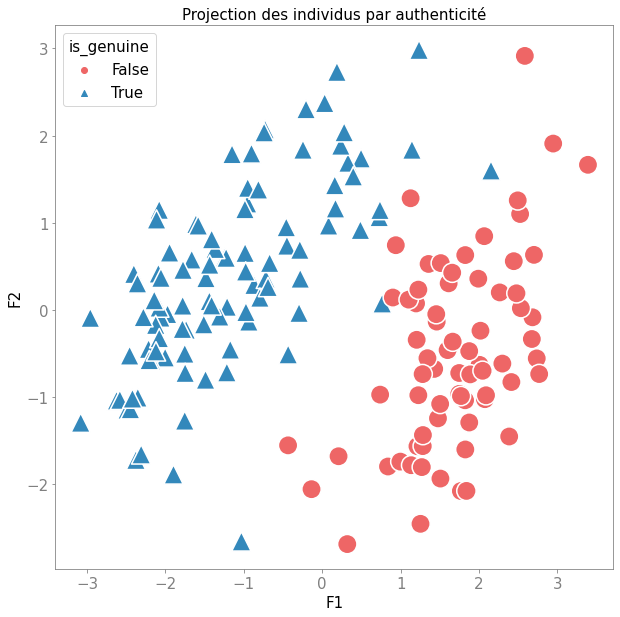

In [77]:
markers = ['o','^']
sns.scatterplot(data=money_acp, x='F1', y='F2', style='is_genuine', hue='is_genuine', markers=markers, s=375)
plt.title('Projection des individus par authenticité',fontsize=15)
plt.show()

Nous constatons des groupes bien distincts selon l'authenticité des billets.

# Mission 2 : Algorithme de classification : K-means

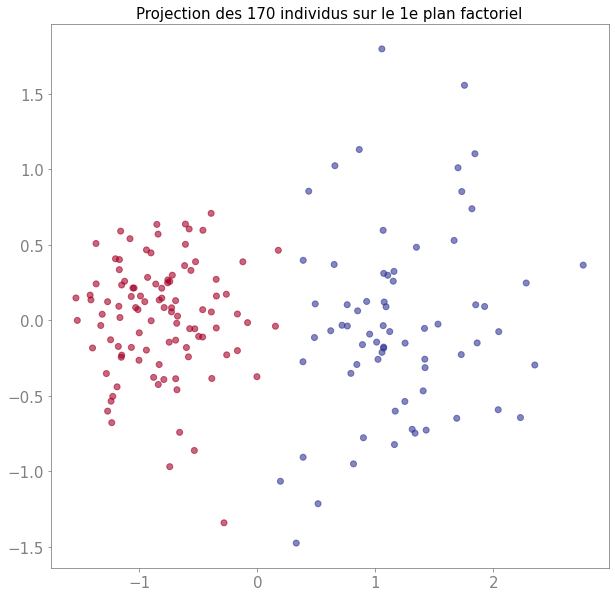

In [78]:
from sklearn import cluster
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from scipy.cluster.hierarchy import linkage, fcluster

# Nombre de clusters souhaités
n_clust = 2

# préparation des données pour le clustering
X = data_pca.values

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters2 = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=2).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters2.astype(float), cmap = 'RdYlBu', alpha=0.6)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]),fontsize=15)
plt.show(block=False)

Notre algorithme distingue deux clusters que nous allons reporter dans notre dataframe "money"

In [79]:
money_acp['cluster'] = clusters2
money_acp

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,F1,F2,cluster
0,True,171.81,104.86,104.95,4.52,2.89,112.83,2.153639,1.599709,0
1,True,171.67,103.74,103.70,4.01,2.87,113.29,-2.110416,-0.526039,0
2,True,171.83,103.76,103.76,4.40,2.88,113.84,-1.973152,-0.048102,0
3,True,171.80,103.78,103.65,3.73,3.12,113.63,-2.059795,-0.089105,0
4,True,172.05,103.70,103.75,5.04,2.27,113.55,-2.403180,0.412170,0
...,...,...,...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78,2.478626,0.189974,1
166,False,173.01,104.59,104.31,5.04,3.05,110.91,2.585331,2.914472,1
167,False,172.47,104.27,104.10,4.88,3.33,110.68,2.067245,0.845602,1
168,False,171.82,103.97,103.88,4.73,3.55,111.87,0.739257,-0.972965,1


In [80]:
dicto = {0: 1, 1: 0} # On inverse les 0 et les 1 afin que les 1 correspondent aux "True" et les 0 aux "False"
money_acp['cluster'] = money_acp['cluster'].map(dicto)
money_acp

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,F1,F2,cluster
0,True,171.81,104.86,104.95,4.52,2.89,112.83,2.153639,1.599709,1
1,True,171.67,103.74,103.70,4.01,2.87,113.29,-2.110416,-0.526039,1
2,True,171.83,103.76,103.76,4.40,2.88,113.84,-1.973152,-0.048102,1
3,True,171.80,103.78,103.65,3.73,3.12,113.63,-2.059795,-0.089105,1
4,True,172.05,103.70,103.75,5.04,2.27,113.55,-2.403180,0.412170,1
...,...,...,...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78,2.478626,0.189974,0
166,False,173.01,104.59,104.31,5.04,3.05,110.91,2.585331,2.914472,0
167,False,172.47,104.27,104.10,4.88,3.33,110.68,2.067245,0.845602,0
168,False,171.82,103.97,103.88,4.73,3.55,111.87,0.739257,-0.972965,0


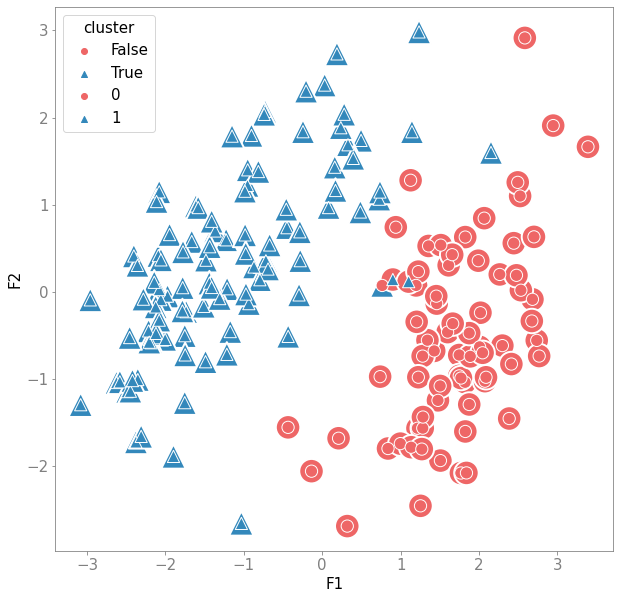

In [81]:
sns.scatterplot(data=money_acp, x='F1', y='F2', markers=markers, style='is_genuine', hue='is_genuine', s=600,)
sns.scatterplot(data=money_acp, x='F1', y='F2', markers=markers, style='cluster', hue='cluster', s=150)
plt.show()

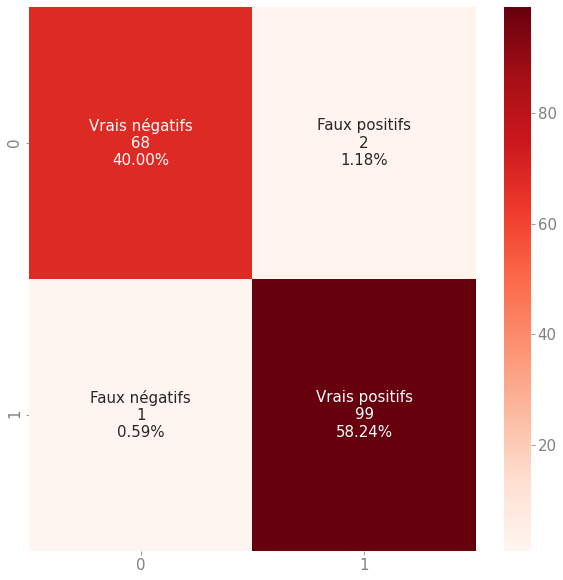

              precision    recall  f1-score   support

       False       0.99      0.97      0.98        70
        True       0.98      0.99      0.99       100

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170



In [103]:
def confusion(a, b, nom_graphique):
    confusion_matrix = sk.metrics.confusion_matrix(a,b)
    group_names = ['Vrais négatifs','Faux positifs','Faux négatifs','Vrais positifs']
    group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
    group_percentages = [
        '{0:.2%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Reds')
    plt.show()
    
    classification = sk.metrics.classification_report(a,b)
    print(classification)
    
confusion(money_acp['is_genuine'], money_acp['cluster'], 'Matrice de confusion des Kmeans')

L'algorithme des kmeans s'est trompé sur seulement 3 billets : un vrai billet a été identifié comme faux et deux faux billets ont été identifiés comme vrais.

# Mission 3 : Régression Logistique & Programme de prédiction

In [104]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [105]:
y = money_acp['is_genuine'] # Target
y

0       True
1       True
2       True
3       True
4       True
       ...  
165    False
166    False
167    False
168    False
169    False
Name: is_genuine, Length: 170, dtype: bool

On définit nos échantillons "train" et "test" afin de faire notre régression logistique.

In [106]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    X_scaled, y, test_size=0.33, random_state=42)
print('\ntrain : utilisé pour entraîner le modèle',
    '\ntest : utilisé pour évaluer le modèle')


train : utilisé pour entraîner le modèle 
test : utilisé pour évaluer le modèle


In [107]:
from sklearn.dummy import DummyClassifier
dummy_biased = DummyClassifier(random_state=0, strategy='uniform')
dummy_biased.fit(X_train, y_train)
y_pred_dummy = dummy_biased.predict(X_test)
print(y_pred_dummy)

[False  True  True False  True  True  True  True  True  True  True False
 False  True False False False False False  True False  True  True False
 False  True  True  True  True False  True False  True False  True  True
 False  True  True False False  True False  True  True  True  True  True
 False  True False  True  True  True  True False  True]


DummyClassifier génère des prédictions en respectant la distribution des classes de l'ensemble d'apprentissage.
Ce classificateur est utile comme base de référence simple pour comparer avec d'autres classificateurs (réels).

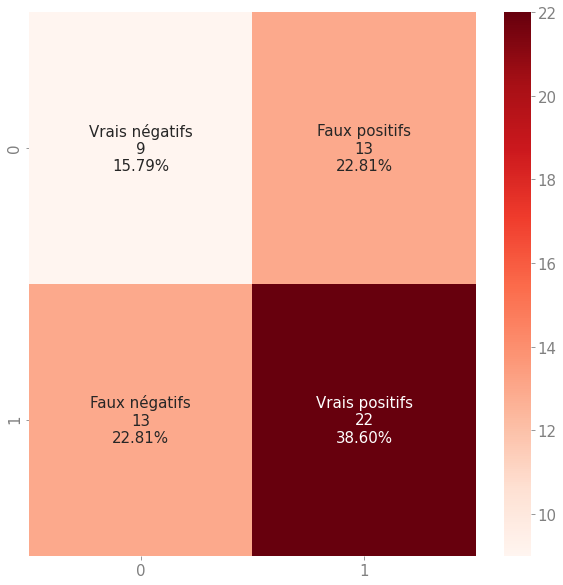

              precision    recall  f1-score   support

       False       0.41      0.41      0.41        22
        True       0.63      0.63      0.63        35

    accuracy                           0.54        57
   macro avg       0.52      0.52      0.52        57
weighted avg       0.54      0.54      0.54        57



In [108]:
matrice_confusion(y_test, y_pred_dummy, 'Matrice de confusion du DummyClassifier')

On observe un grand nombre de faux positifs et de faux négatifs. Comparons désormais avec notre régression logistique.

In [109]:
regression = sk.linear_model.LogisticRegression()
regression.fit(X_train, y_train) #on entraîne le modèle avec fit
pd.DataFrame(
    regression.predict_proba(X_test)).rename(
    columns={0: 'False', 1: 'True'}).head(10)

,False,True
0,0.891750,0.108250
1,0.008633,0.991367
2,0.996318,0.003682
3,0.000202,0.999798
4,0.495264,0.504736
5,0.997718,0.002282
6,0.963555,0.036445
7,0.063299,0.936701
8,0.960113,0.039887
9,0.004716,0.995284


On récupére ensuite les prédictions et on les compare avec les données réelles.

In [110]:
realite = regression.predict(X_test) 
print(realite)

[False  True False  True  True False False  True False  True  True False
 False  True  True  True  True False  True False  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
  True  True False False  True False  True False False  True  True  True
 False  True False False  True  True  True False  True]


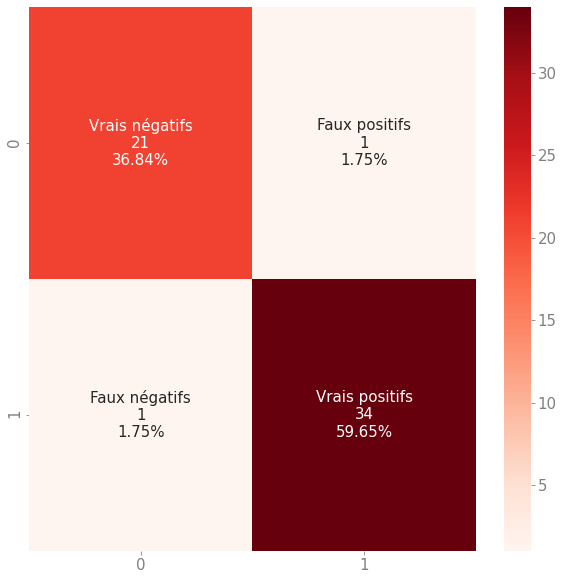

              precision    recall  f1-score   support

       False       0.95      0.95      0.95        22
        True       0.97      0.97      0.97        35

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



In [111]:
matrice_confusion(y_test, realite, 'Matrice de confusion de la régression logistique')

En comparant nos prédictions et la réalité, on constate qu'un seul faux billet a été prédit comme vrai, et un vrai billet a été considéré faux. Un résultat bien meilleur que celui du DummyClassifier ce qui montre que le modèle a été performant et que les prédictions sont en accord avec la réalité.

## Etude de l'impact des variables sur la régression logistique : [SHAP](https://www.aquiladata.fr/insights/shap-mieux-comprendre-linterpretation-de-modeles/)

In [92]:
money

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
True,171.81,104.86,104.95,4.52,2.89,112.83
True,171.67,103.74,103.70,4.01,2.87,113.29
True,171.83,103.76,103.76,4.40,2.88,113.84
True,171.80,103.78,103.65,3.73,3.12,113.63
True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...
False,172.11,104.23,104.45,5.24,3.58,111.78
False,173.01,104.59,104.31,5.04,3.05,110.91
False,172.47,104.27,104.10,4.88,3.33,110.68


Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

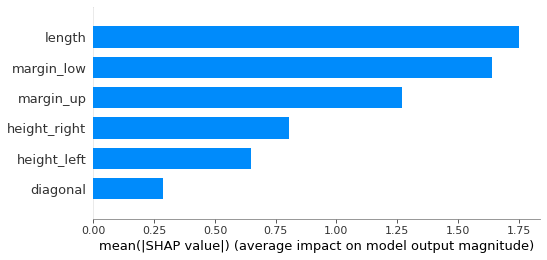

In [93]:
import shap
import matplotlib.pyplot as plt
shap_values = shap.Explainer(regression,masker=shap.maskers.Impute(data=X_train), algorithm="linear").shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar",feature_names=data_pca.columns.to_list(),cmap=plt.get_cmap("cool"))

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


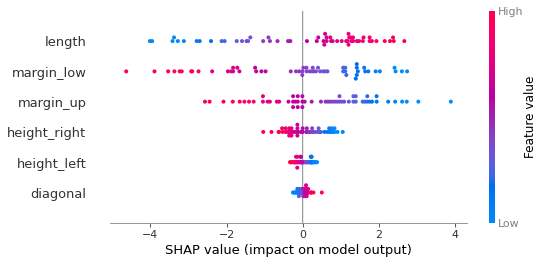

In [94]:
explainer = shap.LinearExplainer(regression, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=data_pca.columns.to_list())

## SHAP, l'explication

Cette approche explique la sortie d’un modèle par la somme des effets de chaque variable. Ils se basent sur la valeur de Shapley qui provient de la théorie des jeux.
Mais la théorie des jeux a besoin d'au moins deux choses : un jeu et des joueurs. 

Comment cela s'applique-t-il à l'explicabilité de l'apprentissage automatique ? Imaginons que nous ayons un modèle prédictif, alors : <br/> Le « <b>jeu</b> » reproduit le résultat du modèle,
<br/> Les « <b>joueurs</b> » sont les caractéristiques incluses dans le modèle.

Ce que fait Shapley, c'est quantifier la contribution que chaque joueur apporte au jeu. Ce que fait SHAP, c'est <b>quantifier la contribution que chaque caractéristique apporte à la prédiction faite par le modèle.</b>

# Programme de détéction de faux billets

In [96]:
pd.read_csv('example.csv')

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [97]:
train_dict = {}
train_dict[0] = std_scale
train_dict[1] = regression
train_dict[2] = pca

In [98]:
import pickle
#https://www.journaldev.com/15638/python-pickle-example

In [99]:
# Sauvegarde du dictionnaire dans un fichier pickle "train".
pickle.dump(train_dict, open('train.p', 'wb'))

In [100]:
from sklearn.decomposition import PCA

def prog_detect(billets_csv): # Programme de détection des faux billets
    
 #Récupération des données du fichier en mode lecture binaire (rb)
    train_dict = pickle.load(open('train.p', 'rb'))
    std_scale = train_dict[0]
    regression = train_dict[1]
    pca = train_dict[2]
   
    
    billets = pd.read_csv(billets_csv) 
    X_csv = billets.drop(['id'], axis=1)    
    X_csv = pd.DataFrame(std_scale.transform(X_csv), columns=X_csv.columns) # CSV standardisé
    
    
    y_log = regression.predict(X_csv) # Prédictions
    pred = []
    for i in range(0, len(y_log)):
        pred.append(y_log[i])
    
    pred = pd.concat([ # Jointure des prédictions
        pd.DataFrame(
        [pred]).rename(index={0: 'Prédiction'}).T.replace(
        {False: 'Faux billet', True: 'Vrai billet'}),
        pd.DataFrame(regression.predict_proba(X_csv)).rename(
        columns={0: 'Probabilité de faux', 1: 'Probabilité de vrai'})], axis=1)
    pred['id'] = billets['id'].unique() 
    
    n_components = 2 # ACP
    reduced = pca.transform(X_csv)
    for i in range(0, n_components):
        pred['PC' + str(i + 1)] = reduced[:, i]   
    
    return pred.iloc[:,:-2]
    
prog_detect('example.csv')

,Prédiction,Probabilité de faux,Probabilité de vrai,id
0,Faux billet,0.962899,0.037101,A_1
1,Faux billet,0.994102,0.005898,A_2
2,Faux billet,0.986890,0.013110,A_3
3,Vrai billet,0.058722,0.941278,A_4
4,Vrai billet,0.004059,0.995941,A_5


In [101]:
#pred.set_index('id', inplace=True)
#pred.loc[predictions['id']=='A_5']